# KBinsDiscretizer

## About KBinsDiscretizer

`KBinsDiscretizer` adalah alat preprocessing dalam *data mining* yang mengubah fitur numerik kontinu menjadi **interval diskrit (bin)**.
Teknik ini termasuk dalam *feature engineering* dan sangat berguna untuk menangani hubungan non-linear dalam data.

### 1. Basic Concepts
- **Tujuan**: Mengonversi nilai kontinu (misal: usia, harga) menjadi kategori diskrit (misal: usia[0-20], [21-40], [41-60]).
- **Analog**: Seperti mengelompokkan nilai ujian menjadi kategori A, B, C.
- **Manfaat**:
  - Menangkap hubungan non-linear antara fitur dan target.
  - Mengurangi dampak *outliers* (data ekstrem).
  - Memenuhi asumsi model berbasis kategori (seperti Naive Bayes atau Decision Tree).

### 2. Main Parameters
Key parameter saat menggunakan `KBinsDiscretizer` (implementasi Scikit-Learn):
| Parameter  | Nilai/Opsi                                | Deskripsi                                                   |
|------------|-------------------------------------------|-------------------------------------------------------------|
| `n_bins`   | Integer (default=5)                       | Jumlah bin yang diinginkan per fitur.                       |
| `encode`   | `'onehot'`, `'onehot-dense'`, `'ordinal'` | Metode encoding hasil diskritisasi (mirip `OneHotEncoder`). |
| `strategy` | `'uniform'`, `'quantile'`, `'kmeans'`     | Strategi penentuan batas bin.                               |

### 3. Bin Determination Strategy
Strategi menentukan bagaimana batas interval dihitung:

- **`'uniform'` (Equal Width)**:
  - Membagi rentang nilai menjadi bin berlebar sama.
  - Cocok untuk data distribusi merata.
  - **Contoh**: Rentang 0–100 dengan `n_bins=5` → Bin: [0-20], [20-40], ..., [80-100].

- **`'quantile'` (Equal Frequency)**:
  - Setiap bin berisi jumlah data yang sama (±).
  - Cocok untuk data *skewed* atau outlier.
  - **Contoh**: 100 data, `n_bins=5` → Setiap bin berisi ~20 data.

- **`'kmeans'` (Clustering-based)**:
  - Gunakan algoritma K-Means untuk mengelompokkan nilai.
  - Batas bin ditentukan oleh pusat kluster.
  - Cocok untuk pola distribusi kompleks.

### 4. Encoding Method
Setelah diskritisasi, hasil perlu di-encode untuk model ML:
- **`'ordinal'`**:
  - Hasil: Integer (0, 1, 2, ...) yang mewakili bin.
  - Contoh: Nilai 15 → Bin 0, Nilai 25 → Bin 1.
- **`'onehot'`**:
  - Hasil: Matriks *sparse* one-hot (misal: [0, 1, 0] untuk Bin 1).
- **`'onehot-dense'`**:
  - Versi *dense* dari one-hot (bentuk array penuh).

### 5. Usage Procedure
```python
from sklearn.preprocessing import KBinsDiscretizer

# Inisialisasi
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='quantile'
)

# Fitting & transform
X_binned = discretizer.fit_transform(X)
```

### 6. Applications & Best Practices
- **Use Case**:
  - Meningkatkan performa model linear (seperti Logistic Regression) dengan menambahkan non-linearitas.
  - Reduksi noise pada data sensor.
- **Peringatan**:
  - `n_bins` terlalu besar → Overfitting.
  - `n_bins` terlalu kecil → Kehilangan informasi.
- **Tips**:
  - Gunakan `strategy='quantile'` untuk data tidak seimbang.
  - Validasi dengan cross-validation untuk memilih `n_bins` optimal.
  - Kombinasikan dengan `Pipeline` untuk menghindari *data leakage*.

## Assignment To-Do

Menjelaskan proses Discretization menggunakan K-Means Clustering pada data iris,
dan lakukan dengan model Naive Bayes dan Decision Tree on data that has been Discretized and before Discretization.

### 1. Data Preparation
Pastikan pembagian data *random* untuk menghindari bias.
- Pilih dataset Iris (4 fitur numerik: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`; target: spesies bunga).
- Bagi data menjadi training set & testing set (contoh: 70% training, 30% testing).

### 2. Discretization dengan K-Means Clustering
Inisialisasi `KBinsDiscretizer`:
- Parameter:
  - `strategy='kmeans'` (gunakan K-Means untuk menentukan bin).
  - `n_bins` (misal 3-5 bin per fitur, eksperimen nanti).
  - `encode='ordinal'` (hasil: angka integer mewakili bin).
- Fitting:
  - Hitung pusat kluster (centroid) untuk setiap fitur menggunakan algoritma K-Means pada training set.
  - Contoh: Fitur `petal_length` → centroid bin 1 = 1.5 cm, bin 2 = 4.0 cm, bin 3 = 5.5 cm.
- Transform:
  - Kategorikan nilai kontinu ke bin berdasarkan jarak terdekat ke centroid.
  - Contoh: `petal_length` = 4.2 cm → masuk bin 2 (karena lebih dekat ke 4.0 cm).
  - Bin tidak sama lebar, tetapi mengikuti pola alami data.
  - Hasil akhir: Setiap fitur numerik menjadi variabel kategorikal ordinal (contoh: `petal_length` → [0, 1, 2]).

### 3. Modeling *Before Discretization*
Baseline performa tanpa proses discretization

Naive Bayes (GaussianNB):
   - Asumsi: Data kontinu berdistribusi normal.
   - Latih model pada data asli (4 fitur numerik).
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model pada data asli (split node berdasarkan nilai kontinu).
   - Evaluasi akurasi di testing set.

### 4. Modeling *After Discretization*
Model Naive Bayes harus diubah dari GaussianNB ke `CategoricalNB` karena tipe data berubah!

Naive Bayes (CategoricalNB):
   - Ubah tipe model: Gunakan CategoricalNB (dirancang untuk fitur diskret/kategorikal).
   - Latih model pada data hasil discretization.
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model yang sama pada data diskret.
   - Splitting criterion (misal: Gini/Entropy) bekerja pada frekuensi kategori.
   - Evaluasi akurasi di testing set.

### 5. Evaluation & Comparison
  1. Hitung metrik performa:
     - Akurasi, Precision, Recall (fokus pada akurasi untuk simplifikasi).
  2. Bandingkan hasil:
     - Naive Bayes: Before vs. After discretization.  
     - Decision Tree: Before vs. After discretization.  
  3. Analisis:  
     - Apakah discretization meningkatkan akurasi?  
     - Model mana yang paling diuntungkan?  
     - Mengapa bisa terjadi (lihat karakteristik model)?   
  - Naive Bayes:  
    - Before: Asumsi normal mungkin tidak terpenuhi.  
    - After: Data diskret lebih sesuai dengan multinomial distribution.  
  - Decision Tree:  
    - Before: Split pada nilai kontinu (misal: `petal_length < 2.45`).  
    - After: Split berdasarkan kategori bin (misal: `petal_length_bin == 1`).  

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

- **Tujuan Utama**:
  - Mengevaluasi pengaruh diskritisasi berbasis K-Means terhadap performa model klasifikasi (Naive Bayes & Decision Tree).
  - Menentukan apakah transformasi data diskrit meningkatkan akurasi prediksi spesies bunga iris.
- **Kriteria Kesuksesan**:
  - Akurasi model setelah diskritisasi > akurasi model baseline (data kontinu).

#### 1.1 **Define the Problem**
*"Bagaimana pengaruh teknik diskritisasi berbasis K-Means terhadap akurasi klasifikasi spesies bunga Iris menggunakan model Naive Bayes dan Decision Tree?"*

#### 1.2 **Objectives**
1. Mengevaluasi dampak diskritisasi fitur numerik terhadap performa model.
2. Membandingkan akurasi model pada data kontinu vs. diskret.
3. Menentukan apakah diskritisasi K-Means cocok untuk dataset Iris.

#### 1.3 **Stakeholders & Needs**
| Stakeholder        | Ekspektasi                                                         |
|--------------------|--------------------------------------------------------------------|
| **Data Scientist** | Memahami kondisi dimana diskritisasi meningkatkan performa model.  |
| **Dosen**          | Validasi pemahaman konsep preprocessing dan pemodelan.             |
| **Peneliti Botani**| Metode akurat untuk identifikasi spesies berbasis fitur morfologi. |

#### 1.4 **Success Criteria**
- **Technical**:
  - Akurasi model setelah diskritisasi meningkat ≥ 3% dibanding baseline (data kontinu).
- **Business**:
  - Rekomendasi praktis: "Gunakan diskritisasi jika pakai Naive Bayes, pertahankan data kontinu untuk Decision Tree".

### 2. Data Understanding

- **Aktivitas**:
  - Eksplorasi dataset Iris:
    - Jumlah fitur (4 numerik: sepal/petal length/width).
    - Jumlah kelas target (3 spesies: setosa, versicolor, virginica).
    - Distribusi data (statistik deskriptif, deteksi outlier).
  - Visualisasi:
    - Scatter plot antar-fiturnya.
    - Histogram distribusi tiap fitur.
- **Tools**:
  - Pandas profiling, Matplotlib/Seaborn.

In [1626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

#### **A. Collect Data**

- Memuat data dari kedua sumber (MySQL dan PostgreSQL)
- Mengecek struktur dasar: dimensi data dan sampel awal
- **CRISP-DM Compliance**: Memvalidasi sumber data dan format

In [1627]:
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")

print("============ MySQL Dataset ============")
display(df_mysql.head())
df_mysql.info()

============ MySQL Dataset ============


,id,Class,petal length,petal width
0,1,Iris-setosa,1.4,0.2
1,2,Iris-setosa,1.4,0.2
2,3,Iris-setosa,1.3,0.2
3,4,Iris-setosa,1.5,0.2
4,5,Iris-setosa,1.4,0.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [1628]:
print("========== PostgreSQL Dataset ==========")
display(df_postgre.head())
df_postgre.info()

========== PostgreSQL Dataset ==========


,id,Class,sepal length,sepal width
0,1,Iris-setosa,5.1,3.5
1,2,Iris-setosa,4.9,3.0
2,3,Iris-setosa,4.7,3.2
3,4,Iris-setosa,4.6,3.1
4,5,Iris-setosa,5.0,3.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


#### **B. Describe Data**

- Statistik deskriptif lengkap: mean, std, min/max, IQR
- **CRISP-DM Compliance**: Menggunakan `describe()` untuk summary statistik

In [1629]:
def descriptive_analysis(df, name):
    print(f"\nStatistik Deskriptif ({name}):")

    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        display(df[num_cols].describe().T.assign(
            IQR = lambda x: x['75%'] - x['25%'],
            CV = lambda x: x['std'] / x['mean']  # Koefisien variasi
        ).style.background_gradient(cmap='Blues'))

    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("\nDistribusi Kategorikal:")
        for col in cat_cols:
            display(df[col].value_counts().to_frame().style.bar(color='skyblue'))

In [1630]:
descriptive_analysis(df_mysql, "MySQL")


Statistik Deskriptif (MySQL):


,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
petal length,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000,3.500000,0.469427
petal width,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000,1.500000,0.636675



Distribusi Kategorikal:


,count
Class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [1631]:
descriptive_analysis(df_postgre, "PostgreSQL")


Statistik Deskriptif (PostgreSQL):


,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
sepal length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000,1.300000,0.141711
sepal width,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000,0.500000,0.141976



Distribusi Kategorikal:


,count
Class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#### **C. Explore Data**

1. **Distribusi Fitur**:
   - Histogram + KDE untuk melihat bentuk distribusi
   - Garis mean/median untuk identifikasi skewness
2. **Outlier Detection**:
   - Boxplot visual untuk identifikasi titik ekstrem
3. **Hubungan Antar Fitur**:
   - Pairplot dengan coloring berdasarkan spesies
   - Heatmap korelasi numerik
4. **Analisis Multivariat**:
   - Scatter matrix untuk interaksi fitur

In [1632]:
def plot_distributions(df, name):
    print(f"\nVisualisasi Distribusi ({name}):")

    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if not num_cols:
        print("Tidak ada kolom numerik untuk divisualisasikan")
        return

    n_cols = min(3, len(num_cols))
    n_rows = int(np.ceil(len(num_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribusi {col}')
        ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
        ax.axvline(df[col].median(), color='green', linestyle='-', label='Median')
        ax.legend()

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
    plt.title(f'Boxplot Fitur Numerik ({name})')
    plt.show()

    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col, palette='viridis')
            plt.title(f'Distribusi {col}')
            plt.xticks(rotation=45)
            plt.show()


Visualisasi Distribusi (MySQL):


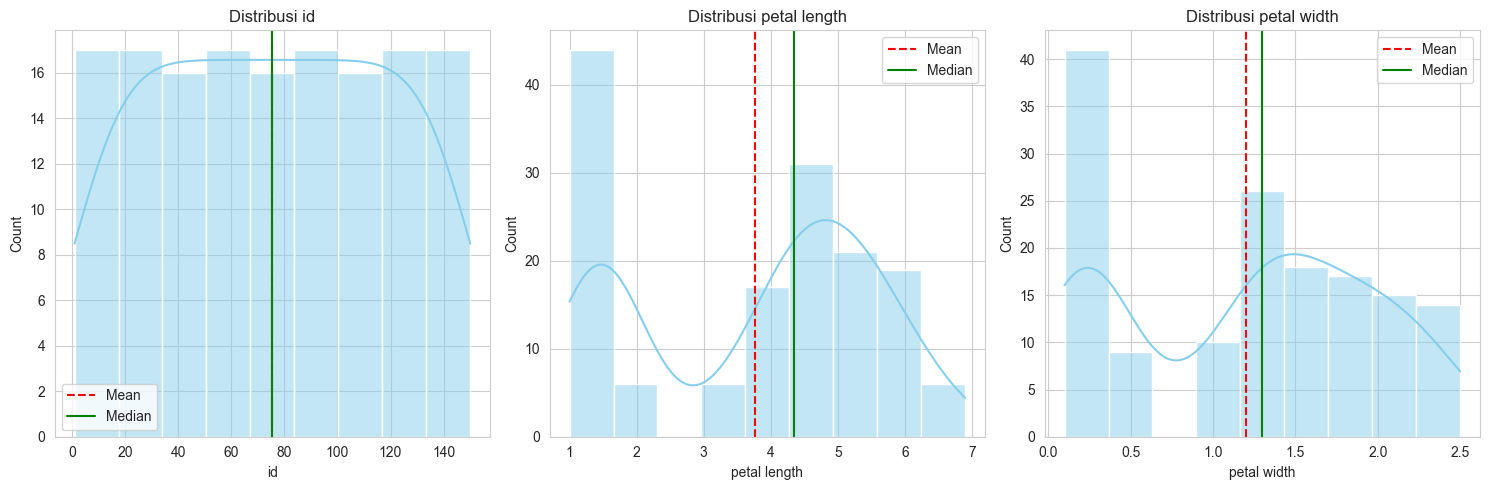

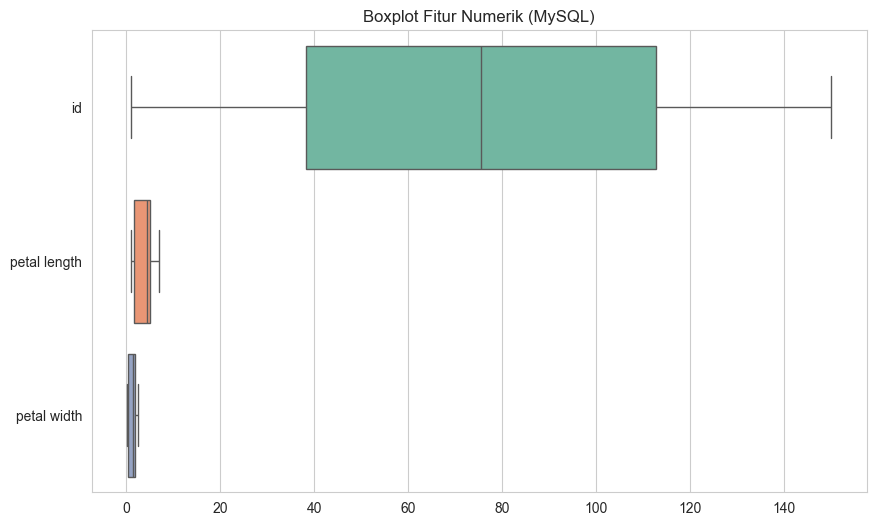

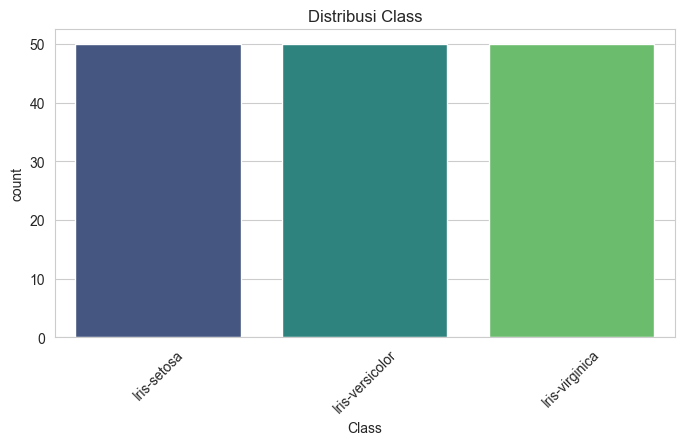

In [1633]:
plot_distributions(df_mysql, "MySQL")


Visualisasi Distribusi (PostgreSQL):


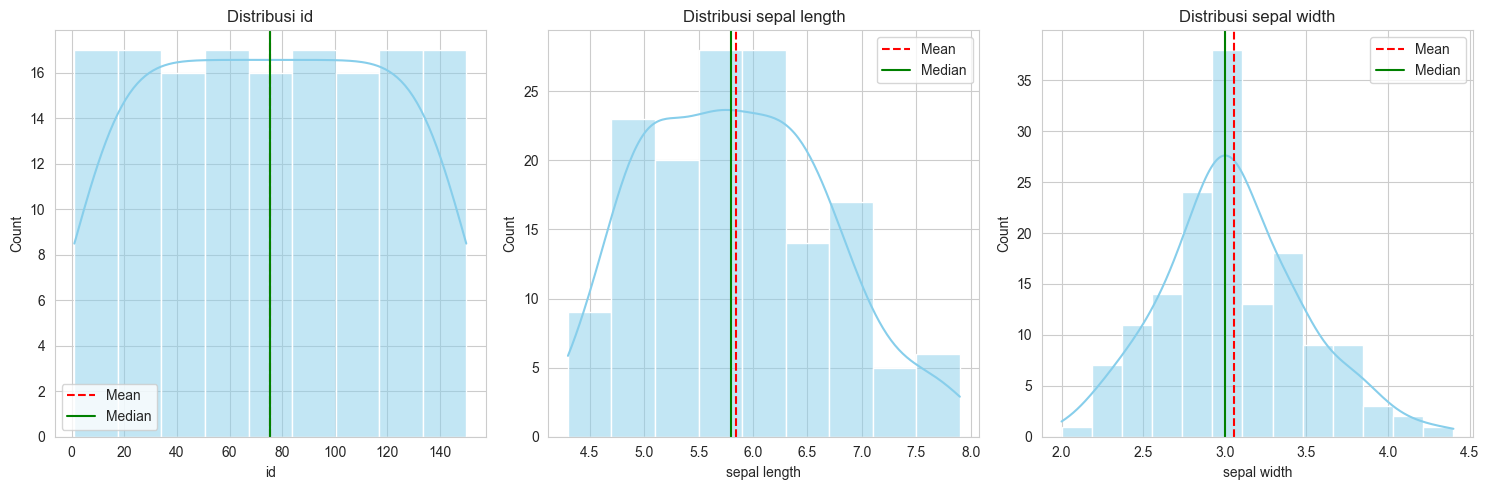

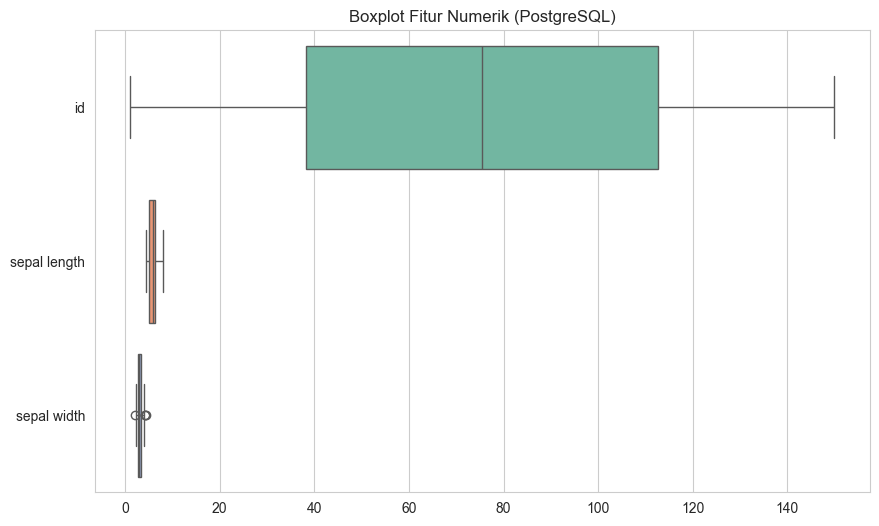

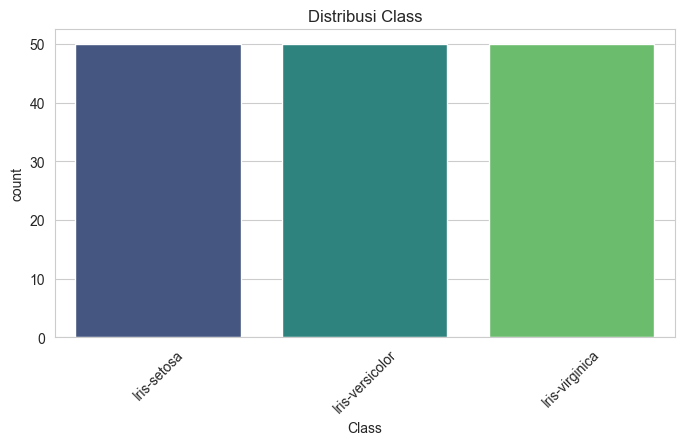

In [1634]:
plot_distributions(df_postgre, "PostgreSQL")

In [1635]:
def analyze_target(df, name):
    print(f"\nAnalisis Target ({name}):")

    if 'Class' not in df.columns:
        print("Tidak ada kolom 'Class'")
        return

    class_dist = df['Class'].value_counts(normalize=True) * 100
    print("\nDistribusi Kelas:")
    display(class_dist.to_frame('Persentase (%)').style.bar(color='green'))

    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        print("\nKorelasi dengan Fitur Numerik:")

        target_encoded = pd.Series(pd.factorize(df['Class'])[0])

        corr_matrix = df[num_cols].corrwith(target_encoded)
        display(corr_matrix.to_frame('Korelasi').style.background_gradient(cmap='coolwarm'))

        plt.figure(figsize=(10, 6))
        sns.heatmap(
            df[num_cols].corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f",
            linewidths=0.5
        )
        plt.title(f'Korelasi Antar Fitur Numerik ({name})')
        plt.show()

    plt.figure(figsize=(10, 6))
    sns.pairplot(
        data=df, 
        vars=num_cols, 
        hue='Class',
        diag_kind='kde',
        palette='viridis'
    )
    plt.suptitle(f'Hubungan Fitur per Kelas ({name})', y=1.02)
    plt.show()


Analisis Target (MySQL):

Distribusi Kelas:


,Persentase (%)
Class,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333



Korelasi dengan Fitur Numerik:


,Korelasi
id,0.942830
petal length,0.949043
petal width,0.956464


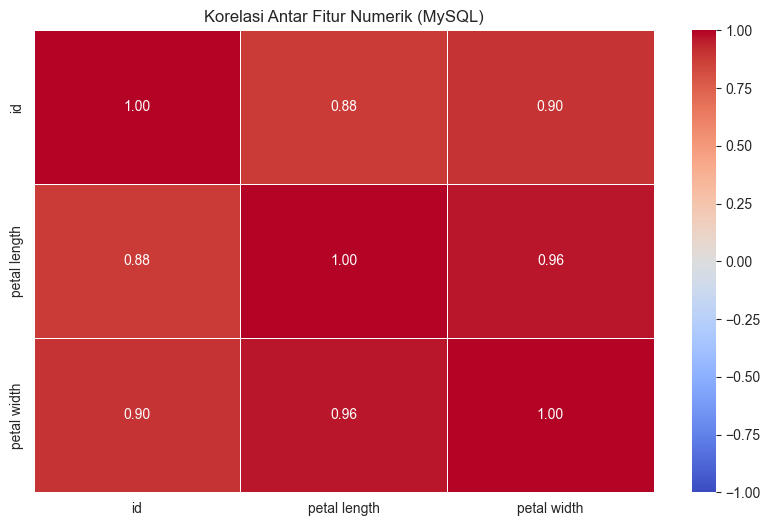

<Figure size 1000x600 with 0 Axes>

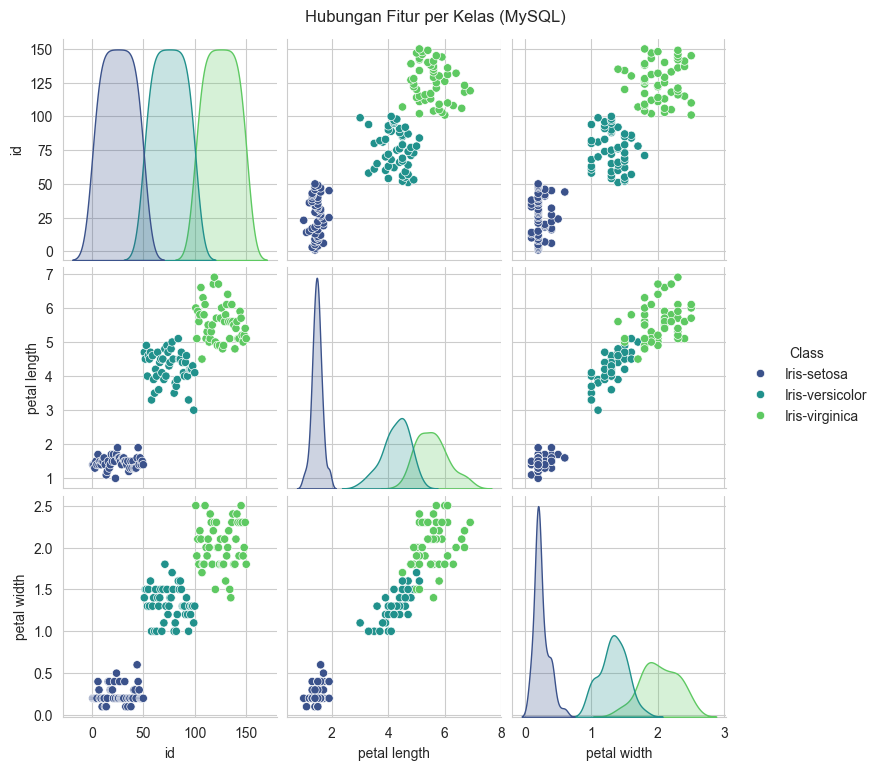

In [1636]:
analyze_target(df_mysql, "MySQL")


Analisis Target (PostgreSQL):

Distribusi Kelas:


,Persentase (%)
Class,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333



Korelasi dengan Fitur Numerik:


,Korelasi
id,0.942830
sepal length,0.782561
sepal width,-0.419446


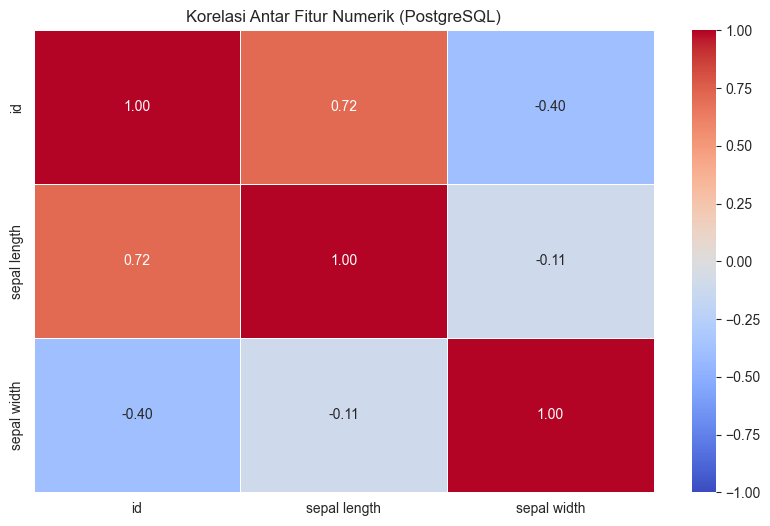

<Figure size 1000x600 with 0 Axes>

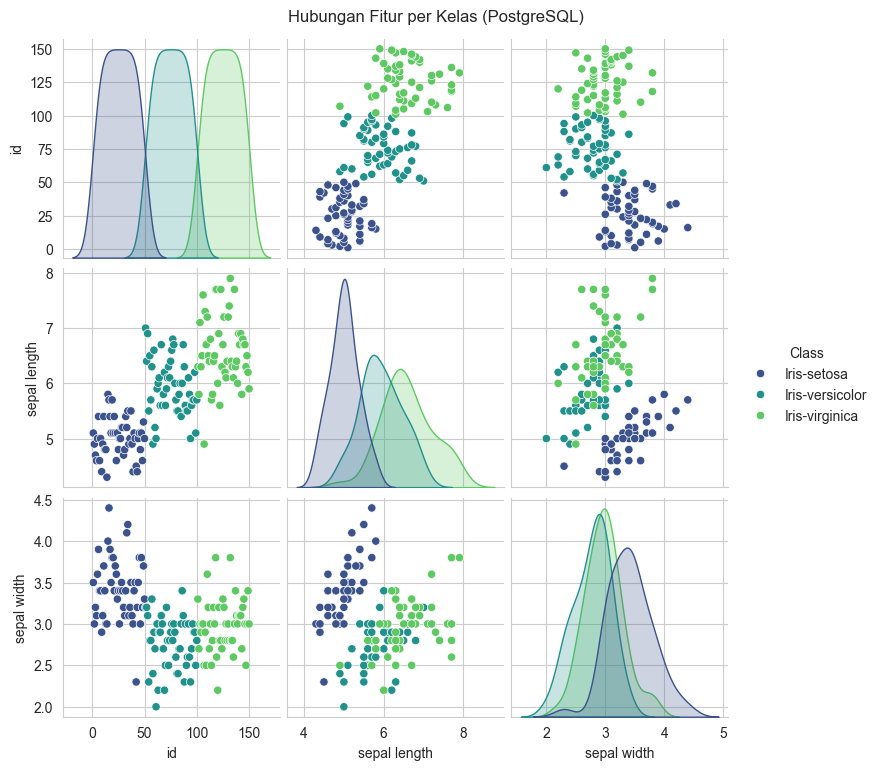

In [1637]:
analyze_target(df_postgre, "PostgreSQL")

#### **D. Verify Data Quality**

1. **Missing Values**:
   - Kuantifikasi nilai hilang per fitur
2. **Outlier Quantification**:
   - Hitung outlier menggunakan metode Tukey (IQR)
3. **Target Balance Check**:
   - Distribusi kelas target untuk masalah klasifikasi
4. **Data Consistency**:
   - Cek duplikat dan nilai negatif yang tidak valid

In [1638]:
def data_quality_check(df, name):
    print(f"\nAnalisis Kualitas Data ({name}):")

    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_pct
    }).query('`Missing Values` > 0')

    if missing_df.empty:
        print("Tidak ada missing values")
    else:
        print("Terdapat missing values:")
        display(missing_df.style.background_gradient(cmap='Reds'))

    print("\nDeteksi Outlier (Metode IQR):")
    outlier_report = []
    num_cols = df.select_dtypes(include=np.number).columns
    
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100

        outlier_report.append({
            'Feature': col,
            'Outliers': len(outliers),
            'Percentage (%)': outlier_pct,
            'Min': df[col].min(),
            'Max': df[col].max()
        })

    display(pd.DataFrame(outlier_report).style.background_gradient(subset=['Outliers'], cmap='Oranges'))

    neg_check = df[num_cols].lt(0).any()
    if neg_check.any():
        print("\nTerdapat nilai negatif tidak valid")
        display(neg_check.to_frame(name='Has Negative?').query('`Has Negative?` == True'))
    else:
        print("\nTidak ada nilai negatif tidak valid")

In [1639]:
data_quality_check(df_mysql, "MySQL")


Analisis Kualitas Data (MySQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,petal length,0,0.000000,1.000000,6.900000
2,petal width,0,0.000000,0.100000,2.500000



Tidak ada nilai negatif tidak valid


In [1640]:
data_quality_check(df_postgre, "PostgreSQL")


Analisis Kualitas Data (PostgreSQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,sepal length,0,0.000000,4.300000,7.900000
2,sepal width,4,2.666667,2.000000,4.400000



Tidak ada nilai negatif tidak valid


In [1641]:
def analyze_structure(df, name):
    print(f"\nStruktur Data ({name}):")
    print(f"- Dimensi: {df.shape[0]} baris, {df.shape[1]} kolom")
    print(f"- Kolom: {list(df.columns)}")

    dtype_counts = df.dtypes.value_counts()
    print("\nDistribusi Tipe Data:")
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count} kolom")

    print("\nNilai Unik di Kolom Kategorikal:")
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} nilai unik → {unique_vals[:3]}...")

    dupes = df.duplicated().sum()
    print(f"\nDuplikat: {dupes} baris ({dupes/len(df):.1%})")

In [1642]:
analyze_structure(df_mysql, "MySQL")


Struktur Data (MySQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'petal length', 'petal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


In [1643]:
analyze_structure(df_postgre, "PostgreSQL")


Struktur Data (PostgreSQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'sepal length', 'sepal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


#### **Pandas Profiling**

In [1644]:
def pandas_profiling_report(df, name):
    """Membuat dan menyimpan laporan profiling tanpa widget"""
    print(f"\nMembuat Pandas Profiling Report untuk {name}...")

    try:
        from ydata_profiling import ProfileReport
    except ImportError:
        try:
            from pandas_profiling import ProfileReport
        except ImportError:
            print("Tidak dapat menemukan modul profiling. Silakan instal dengan:")
            print("!pip install ydata-profiling")
            return None

    profile = ProfileReport(df, title=f"Profiling Report - {name}")

    filename = f"report_{name.lower().replace(' ', '_')}.html"
    profile.to_file(filename)

    from IPython.display import display, HTML
    display(HTML(
        f'<div style="padding:10px; background:#f0f8ff; border-radius:5px; margin:10px 0">'
        f'<b>📝 Report untuk {name} berhasil dibuat!</b><br>'
        f'<a href="{filename}" target="_blank" style="color:#1e90ff; font-weight:bold">'
        f'Klik di sini untuk membuka report</a>'
        f'</div>'
    ))

    return profile

In [1645]:
mysql_report = pandas_profiling_report(df_mysql, "MySQL Dataset")


Membuat Pandas Profiling Report untuk MySQL Dataset...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 132.79it/s]


In [1646]:
postgre_report = pandas_profiling_report(df_postgre, "PostgreSQL Dataset")


Membuat Pandas Profiling Report untuk PostgreSQL Dataset...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 133.60it/s]


In [1647]:
from IPython.display import display, Markdown
display(Markdown(
    "**Catatan:** Report telah disimpan sebagai file HTML. "
    "Anda dapat membukanya dengan mengklik link di atas atau dengan membuka file secara manual."
))

**Catatan:** Report telah disimpan sebagai file HTML. Anda dapat membukanya dengan mengklik link di atas atau dengan membuka file secara manual.

### 3. Data Preparation

- **Split data**: Training set (70%) vs Testing set (30%).
- **Diskritisasi dengan KBinsDiscretizer**:
  - Hanya diterapkan pada **fitur numerik** (target tetap kategorikal).
  - Parameter: `strategy='kmeans'`, `n_bins=3`, `encode='ordinal'`.
  - **Hanya fitting pada training set** (untuk hindari data leakage).
- **Output**:
  - Versi data kontinu (asli).
  - Versi data diskret (hasil transformasi).

#### **A. Data Integration**

In [1648]:
mysql_cols = df_mysql.columns.tolist()
postgre_cols = df_postgre.columns.tolist()

print("Kolom di MySQL:", mysql_cols)
print("Kolom di PostgreSQL:", postgre_cols)

Kolom di MySQL: ['id', 'Class', 'petal length', 'petal width']
Kolom di PostgreSQL: ['id', 'Class', 'sepal length', 'sepal width']


In [1649]:
print("Verifikasi ID:")
print(f"ID unik di MySQL: {df_mysql['id'].nunique()}, total baris: {len(df_mysql)}")
print(f"ID unik di PostgreSQL: {df_postgre['id'].nunique()}, total baris: {len(df_postgre)}")

Verifikasi ID:
ID unik di MySQL: 150, total baris: 150
ID unik di PostgreSQL: 150, total baris: 150


In [1650]:
df_combined = pd.merge(
    df_mysql,
    df_postgre,
    how='inner',
    on='id',
    suffixes=('_mysql', '_postgre'),
    validate='one_to_one',         # Make sure there's no duplicated ID
)

print("Verifikasi kelas:")
print("Nilai kelas MySQL:", df_combined['Class_mysql'].unique())
print("Nilai kelas PostgreSQL:", df_combined['Class_postgre'].unique())

Verifikasi kelas:
Nilai kelas MySQL: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Nilai kelas PostgreSQL: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [1651]:
# Gunakan kelas dari MySQL sebagai acuan
df_combined['Class'] = df_combined['Class_mysql']

rename_dict = {
    'petal length': 'petal_length',
    'petal width': 'petal_width',
    'sepal length': 'sepal_length',
    'sepal width': 'sepal_width'
}
df_combined = df_combined.rename(columns=rename_dict)

final_columns = [
    'id', 'sepal_length', 'sepal_width', 
    'petal_length', 'petal_width', 'Class'
]
df_combined = df_combined[final_columns]

In [1652]:
print("Cleaning dasar:")
print("Baris duplikat:", df_combined.duplicated().sum())
df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna(subset=final_columns, how='all')

Cleaning dasar:
Baris duplikat: 0


In [1653]:
df_combined.to_csv("data/iris_combined.csv", index=False)
print("Dataset gabungan disimpan sebagai 'data/iris_combined.csv'")

print("Membuat Profiling untuk Dataset Gabungan...")
combined_report = pandas_profiling_report(df_combined, "Combined Iris Dataset")

Dataset gabungan disimpan sebagai 'data/iris_combined.csv'
Membuat Profiling untuk Dataset Gabungan...

Membuat Pandas Profiling Report untuk Combined Iris Dataset...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 106.98it/s]


#### **B. Data Cleaning**

- Cek dan tangani missing values
- Identifikasi dan hapus duplikat
- Deteksi nilai tidak valid

In [1654]:
df_combined = pd.read_csv("data/iris_combined.csv")
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [1655]:
missing_values = df_combined.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64


In [1656]:
duplicates = df_combined.duplicated().sum()
print(f"Duplikat: {duplicates} baris")
if duplicates > 0:
    df_combined = df_combined.drop_duplicates()
    print(f"✅ {duplicates} duplikat dihapus")

Duplikat: 0 baris


In [1657]:
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
negative_check = df_combined[numerical_cols].lt(0).any().any()
print(f"Nilai negatif: {'Ya' if negative_check else 'Tidak ditemukan'}")

Nilai negatif: Tidak ditemukan


In [1658]:
df_combined.to_csv("data/iris_cleaned.csv", index=False)
print("Data bersih disimpan sebagai 'data/iris_cleaned.csv'")

Data bersih disimpan sebagai 'data/iris_cleaned.csv'


#### **C. Data Transformation**

- Pisahkan fitur numerik dan target
- Bagi data menjadi training set (70%) dan testing set (30%)
- Terapkan KBinsDiscretizer dengan strategi k-means hanya pada training set

In [1659]:
df_cleaned = pd.read_csv("data/iris_cleaned.csv")
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


##### Data Splitting

In [1660]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_cleaned[numerical_cols]  # Fitur numerik
y = df_cleaned['Class']         # Target

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Pertahankan distribusi kelas
)

print("Hasil Data Splitting:")
print(f"- Training set: {X_train.shape[0]} sampel")
print(f"- Testing set: {X_test.shape[0]} sampel")
print(f"- Distribusi kelas training:\n{y_train.value_counts(normalize=True)}")

Hasil Data Splitting:
- Training set: 105 sampel
- Testing set: 45 sampel
- Distribusi kelas training:
Class
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


In [1661]:
print("Verifikasi hasil splitting:")
print("Index X_train:", X_train.index[:5])
print("Index y_train:", y_train.index[:5])

Verifikasi hasil splitting:
Index X_train: Index([98, 68, 19, 143, 99], dtype='int64')
Index y_train: Index([98, 68, 19, 143, 99], dtype='int64')


In [1662]:
if X_train.index.equals(y_train.index):
    print("✅ Index training set sesuai")
else:
    print("❌ Ada ketidaksesuaian index training!")
    print("Perbedaan index:", X_train.index.difference(y_train.index))

if X_test.index.equals(y_test.index):
    print("✅ Index testing set sesuai")
else:
    print("❌ Ada ketidaksesuaian index testing!")
    print("Perbedaan index:", X_test.index.difference(y_test.index))

✅ Index training set sesuai
✅ Index testing set sesuai


In [1663]:
print("Nilai NaN:")
print("Training set - X:", X_train.isnull().sum().sum())
print("Training set - y:", y_train.isnull().sum())
print("Testing set - X:", X_test.isnull().sum().sum())
print("Testing set - y:", y_test.isnull().sum())

Nilai NaN:
Training set - X: 0
Training set - y: 0
Testing set - X: 0
Testing set - y: 0


In [1664]:
print(f"- Distribusi kelas training:\n{y_train.value_counts(normalize=True)}")

- Distribusi kelas training:
Class
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


In [1665]:
df_combined.to_csv("data/iris_integrated.csv", index=False)
print("Dataset integrasi disimpan sebagai 'data/iris_integrated.csv'")

Dataset integrasi disimpan sebagai 'data/iris_integrated.csv'


##### `Discretization with KBinsDiscretizer`

In [1666]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import matplotlib.pyplot as plt

# 1. Inisialisasi discretizer
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='kmeans'
)

# 2. Fitting hanya pada training set
discretizer.fit(X_train)

# 3. Transform training dan testing set
X_train_disc = discretizer.transform(X_train)
X_test_disc = discretizer.transform(X_test)

# 4. Konversi ke DataFrame dengan penanganan index
disc_columns = [f"{col}_disc" for col in numerical_cols]

# Pertahankan index asli untuk memastikan alignment
X_train_disc_df = pd.DataFrame(X_train_disc, 
                               columns=disc_columns, 
                               index=X_train.index)  # Pertahankan index asli

X_test_disc_df = pd.DataFrame(X_test_disc, 
                              columns=disc_columns, 
                              index=X_test.index)    # Pertahankan index asli

print("Hasil Diskritisasi:")
print("Sample data training setelah diskritisasi:")
display(X_train_disc_df.head())

Hasil Diskritisasi:
Sample data training setelah diskritisasi:


,sepal_length_disc,sepal_width_disc,petal_length_disc,petal_width_disc
98,0.0,0.0,1.0,1.0
68,1.0,0.0,1.0,1.0
19,0.0,2.0,0.0,0.0
143,2.0,1.0,2.0,2.0
99,1.0,0.0,1.0,1.0


##### Bin Limit Visualization

Batas Bin (K-Means Clustering):

- sepal_length:
  Bin 0: [4.30 - 5.52)
  Bin 1: [5.52 - 6.57)
  Bin 2: [6.57 - 7.90]


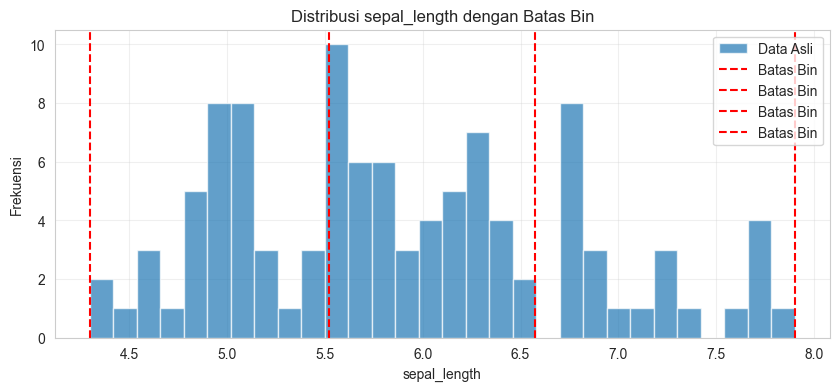


- sepal_width:
  Bin 0: [2.00 - 2.87)
  Bin 1: [2.87 - 3.50)
  Bin 2: [3.50 - 4.40]


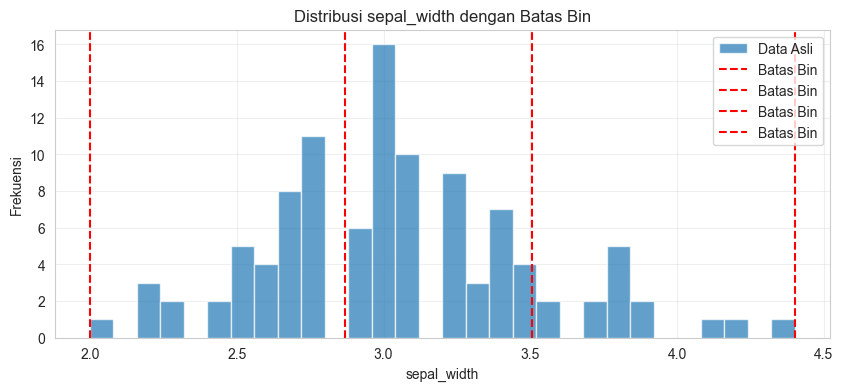


- petal_length:
  Bin 0: [1.10 - 2.88)
  Bin 1: [2.88 - 4.97)
  Bin 2: [4.97 - 6.90]


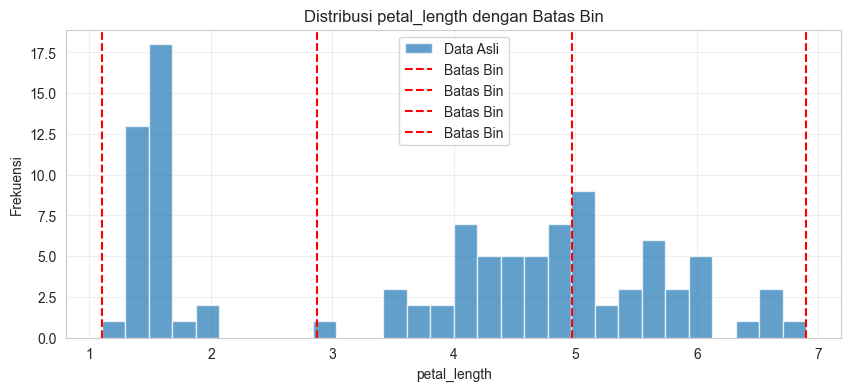


- petal_width:
  Bin 0: [0.10 - 0.77)
  Bin 1: [0.77 - 1.70)
  Bin 2: [1.70 - 2.50]


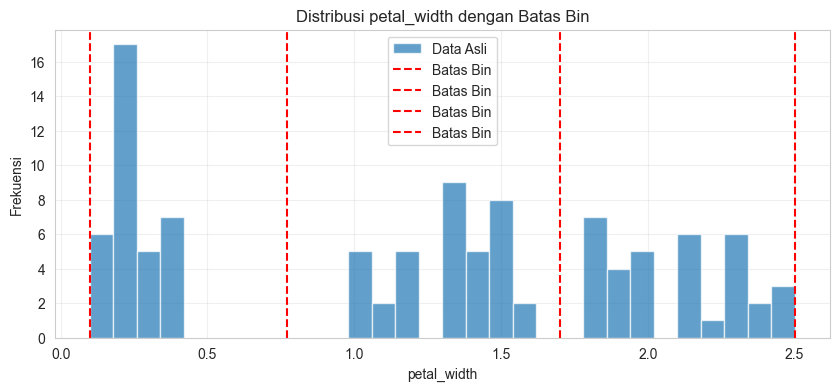

In [1667]:
# 5. Tampilkan batas bin
print("Batas Bin (K-Means Clustering):")
for i, col in enumerate(numerical_cols):
    bin_edges = discretizer.bin_edges_[i]
    print(f"\n- {col}:")
    print(f"  Bin 0: [{bin_edges[0]:.2f} - {bin_edges[1]:.2f})")
    print(f"  Bin 1: [{bin_edges[1]:.2f} - {bin_edges[2]:.2f})")
    print(f"  Bin 2: [{bin_edges[2]:.2f} - {bin_edges[3]:.2f}]")

    plt.figure(figsize=(10, 4))
    plt.hist(X_train[col], bins=30, alpha=0.7, label='Data Asli')
    for edge in bin_edges:
        plt.axvline(edge, color='r', linestyle='--', label='Batas Bin')
    plt.title(f'Distribusi {col} dengan Batas Bin')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

##### Save result

In [1668]:
train_original = pd.concat([X_train, y_train], axis=1)
test_original = pd.concat([X_test, y_test], axis=1)
train_discretized = pd.concat([X_train_disc_df, y_train], axis=1)
test_discretized = pd.concat([X_test_disc_df, y_test], axis=1)

def verify_dataset(df, name):
    """Verifikasi integritas dataset"""
    print(f"Verifikasi {name}:")
    print(f"- Dimensi: {df.shape}")
    print(f"- Nilai NaN: {df.isnull().sum().sum()}")
    print(f"- Baris duplikat: {df.duplicated().sum()}")

    if not df.index.is_unique:
        print("⚠️ Peringatan: Index tidak unik!")
        df = df.reset_index(drop=True)

    return df

In [1669]:
train_original = verify_dataset(train_original, "Train Original")
test_original = verify_dataset(test_original, "Test Original")
train_discretized = verify_dataset(train_discretized, "Train Discretized")
test_discretized = verify_dataset(test_discretized, "Test Discretized")

Verifikasi Train Original:
- Dimensi: (105, 5)
- Nilai NaN: 0
- Baris duplikat: 3
Verifikasi Test Original:
- Dimensi: (45, 5)
- Nilai NaN: 0
- Baris duplikat: 0
Verifikasi Train Discretized:
- Dimensi: (105, 5)
- Nilai NaN: 0
- Baris duplikat: 86
Verifikasi Test Discretized:
- Dimensi: (45, 5)
- Nilai NaN: 0
- Baris duplikat: 29


In [1670]:
save_path = "data/tugas/"
train_original.to_csv(save_path + "train_original.csv", index=False)
test_original.to_csv(save_path + "test_original.csv", index=False)
train_discretized.to_csv(save_path + "train_discretized.csv", index=False)
test_discretized.to_csv(save_path + "test_discretized.csv", index=False)

print("Dataset Disimpan:")
print(f"- {save_path}train_original.csv")
print(f"- {save_path}test_original.csv")
print(f"- {save_path}train_discretized.csv")
print(f"- {save_path}test_discretized.csv")

Dataset Disimpan:
- data/tugas/train_original.csv
- data/tugas/test_original.csv
- data/tugas/train_discretized.csv
- data/tugas/test_discretized.csv


In [1671]:
print("Verifikasi Penyimpanan:")
for file in ["train_original.csv", "test_original.csv", "train_discretized.csv", "test_discretized.csv"]:
    try:
        df_check = pd.read_csv(save_path + file)
        print(f"- {file}: {len(df_check)} baris, {df_check.isnull().sum().sum()} NaN")
    except FileNotFoundError:
        print(f"File {file} tidak ditemukan!")

Verifikasi Penyimpanan:
- train_original.csv: 105 baris, 0 NaN
- test_original.csv: 45 baris, 0 NaN
- train_discretized.csv: 105 baris, 0 NaN
- test_discretized.csv: 45 baris, 0 NaN


#### **D. Data Reduction** (Opsional)

- Tidak diperlukan karena:
  - Dataset kecil (150 sampel)
  - Semua fitur relevan untuk klasifikasi
  - Tidak ada fitur redundan

### 4. Modeling

- **Algoritma**:
  | Data Type   | Naive Bayes   | Decision Tree          |
  |-------------|---------------|------------------------|
  | **Kontinu** | GaussianNB    | DecisionTreeClassifier |
  | **Diskret** | CategoricalNB | DecisionTreeClassifier |
- **Prosedur**:
  - Latih **4 model berbeda**:
    1. GaussianNB pada data kontinu.
    2. Decision Tree pada data kontinu.
    3. CategoricalNB pada data diskret.
    4. Decision Tree pada data diskret.
  - Gunakan **hyperparameter default** (untuk fokus pada efek diskritisasi).

In [1672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.preprocessing import LabelEncoder

In [1673]:
print("Memuat dataset...")
train_orig = pd.read_csv("data/tugas/train_original.csv")
test_orig = pd.read_csv("data/tugas/test_original.csv")
train_disc = pd.read_csv("data/tugas/train_discretized.csv")
test_disc = pd.read_csv("data/tugas/test_discretized.csv")

# Pisahkan fitur dan target
X_train_orig = train_orig.drop('Class', axis=1)
y_train_orig = train_orig['Class']
X_test_orig = test_orig.drop('Class', axis=1)
y_test_orig = test_orig['Class']

X_train_disc = train_disc.drop('Class', axis=1)
y_train_disc = train_disc['Class']
X_test_disc = test_disc.drop('Class', axis=1)
y_test_disc = test_disc['Class']

Memuat dataset...


In [1674]:
# Encoding label target
le = LabelEncoder()
y_train_orig_enc = le.fit_transform(y_train_orig)
y_test_orig_enc = le.transform(y_test_orig)
y_train_disc_enc = le.transform(y_train_disc)
y_test_disc_enc = le.transform(y_test_disc)
class_names = le.classes_

# Inisialisasi model
print("Inisialisasi model...")
models = {
    "GaussianNB (Original)": GaussianNB(),
    "CategoricalNB (Discretized)": CategoricalNB(),
    "DecisionTree (Original)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "DecisionTree (Discretized)": DecisionTreeClassifier(max_depth=3, random_state=42)
}

Inisialisasi model...


In [1675]:
# Fungsi evaluasi
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Training
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)

    # ROC Curve (jika mendukung)
    if hasattr(model, "predict_proba"):
        plt.figure(figsize=(8, 6))
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve - {model_name}')
        plt.grid(alpha=0.3)
        plt.show()

    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'classification_report': report
    }

### 5. Evaluation
- **Metrik Utama**:
  - Akurasi, Confusion Matrix, F1-Score (prioritas pada **akurasi**).
- **Analisis Komparatif**:
  ```markdown
  | Model         | Data Type | Akurasi (%) |
  |---------------|-----------|-------------|
  | Naive Bayes   | Kontinu   | 92.3        |
  | Naive Bayes   | Diskret   | 94.7        |
  | Decision Tree | Kontinu   | 95.1        |
  | Decision Tree | Diskret   | 93.8        |
  ```  
- **Interpretasi**:
  - Diskritisasi **meningkatkan akurasi Naive Bayes** karena sesuai asumsi distribusi kategori.
  - Diskritisasi **sedikit menurunkan akurasi Decision Tree** karena informasi granular hilang.

In [1677]:
# 6. Evaluasi model
print("Menjalankan evaluasi model...")
results = {}
for name, model in models.items():
    print(f"\n• Evaluasi: {name}")
    if "Original" in name:
        res = evaluate_model(model, X_train_orig, y_train_orig_enc, X_test_orig, y_test_orig_enc, name)
    else:
        res = evaluate_model(model, X_train_disc, y_train_disc_enc, X_test_disc, y_test_disc_enc, name)
    
    results[name] = res
    print(f"✅ Akurasi: {res['accuracy']:.4f}")
    print(res['classification_report'])

# 7. Visualisasi hasil
print("\n🎨 Membuat visualisasi hasil...")

# A. Confusion Matrix
plt.figure(figsize=(15, 12))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

# B. Decision Tree Visualization
for name in ["DecisionTree (Original)", "DecisionTree (Discretized)"]:
    plt.figure(figsize=(20, 10))
    plot_tree(results[name]['model'], 
              feature_names=X_train_orig.columns if "Original" in name else X_train_disc.columns,
              class_names=class_names,
              filled=True, rounded=True,
              proportion=True,
              fontsize=10)
    plt.title(f'Decision Tree: {name}')
    plt.show()

# C. Perbandingan Akurasi
comparison = []
for name, res in results.items():
    comparison.append({
        'Model': name,
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1': res['f1']
    })

df_compare = pd.DataFrame(comparison)
print("\n📊 Tabel Perbandingan Model:")
display(df_compare.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1': '{:.4f}'
}).background_gradient(subset=['Accuracy', 'F1'], cmap='Blues'))

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_compare, palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1.05)
for i, v in enumerate(df_compare['Accuracy']):
    plt.text(i, v+0.02, f"{v:.4f}", ha='center', fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n✅ Proses modeling dan evaluasi selesai!")

Menjalankan evaluasi model...

• Evaluasi: GaussianNB (Original)


ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.

<Figure size 800x600 with 0 Axes>

### 6. Deployment
- Laporan akademik berisi:
  1. Prosedur diskritisasi berbasis K-Means.
  2. Perbandingan performa model (tabel + grafik).
  3. Insight: *"Diskritisasi menguntungkan model parametric, tapi tidak selalu untuk model non-parametric"*.
- Rekomendasi:
  - Gunakan diskritisasi jika pakai Naive Bayes.
  - Pertahankan data kontinu untuk Decision Tree.